<a href="https://colab.research.google.com/github/dawud-shakir/CS591-DIP/blob/main/dawud_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 1 - Image Manipulation (10 pts)
---
By completing this homework assignment, you will implement image brightness and domain manipulations, and understand the differences between forward mapping and backward mapping.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Load image and display it. Feel free to load any image you want, but remember to submit your image if you don't use the image that comes with the assignment.

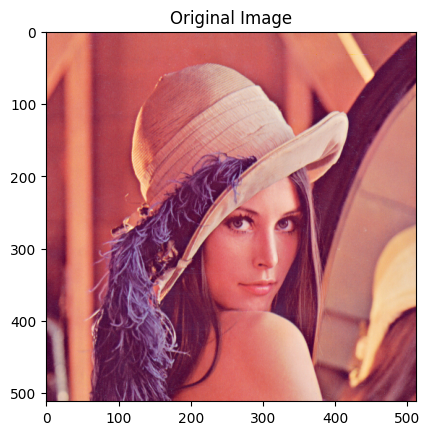

In [ ]:

img = np.array(Image.open("Lenna.png").convert("RGB"))
plt.imshow(img)
plt.title("Original Image")
plt.show()



###Task 1 (2 pts)

Implement a function to adjust brightness of all the pixels in the image. Use the function to brighten and darken the original image, and display the brightened and darkened images. (value=20 and value=-20 are just representative values, you can use any value you want to show visible brightness change)

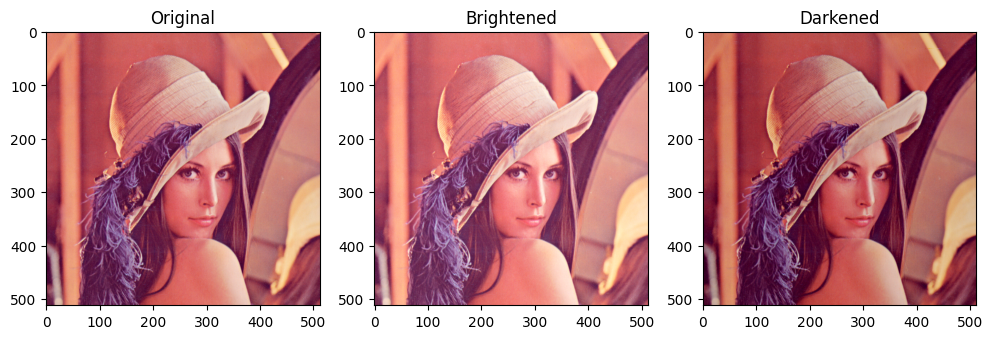

In [ ]:
def adjust_brightness(img, value):
    # Convert to 32-bit before adding value to prevent underflow/overflow
    out = img.astype(np.int32) + int(value)

    # Clamp to 8-bit range
    out[out < 0] = 0
    out[out > 255] = 255

    # Return 8-bit
    return out.astype(np.uint8)

bright_img = adjust_brightness(img, value=20)
dark_img = adjust_brightness(img, value=-20)

#display original, brightened and darkened images
#feel free to edit this section if you want
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(bright_img)
plt.title("Brightened")

plt.subplot(1,3,3)
plt.imshow(dark_img)
plt.title("Darkened")

plt.show()

###Task 2 (2 pts)

In this task, you will implement image cropping using direct matrix slicing. Crop out and display a rectangular region that contains the eyes, nose, and mouth. You must implement cropping using NumPy array slicing. For example, cropped = img[y0:y1, x0:x1]

Text(0.5, 1.0, 'Cropped Image')

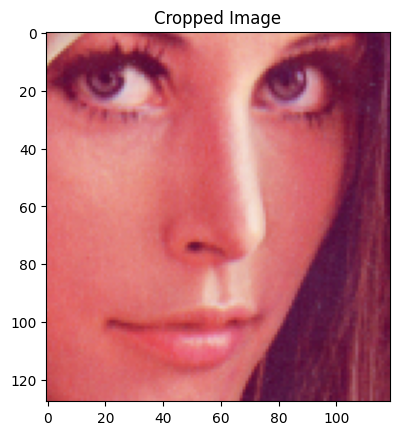

In [ ]:
cropped_img = img[249:377, 245:364, :]

plt.figure()

plt.imshow(cropped_img)
plt.title("Cropped Image")

###Task 3 (2 pts)

Implement 2D transformation functions: translation, rotation, scaling, shear, mirror

In [ ]:
def translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def scaling(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def shear(sh_x, sh_y):
    return np.array([
        [1, sh_x, 0],
        [sh_y, 1, 0],
        [0, 0, 1]
    ])

def mirror(theta):
    return np.array([
        [np.cos(2*theta), np.sin(2*theta), 0],
        [np.sin(2*theta), -np.cos(2*theta), 0],
        [0, 0, 1]
    ])

###Task 4 (2 pts) Image Warping

Implement forward mapping and backward mapping. (T_inv is $T^{-1}$)

In [ ]:
def warp_forward(img, T):
    H, W, C = img.shape
    out = np.zeros_like(img)

    for ys in range(H):
        for xs in range(W):
            dst = T @ np.array([xs, ys, 1])
            xd = int(round(dst[0]))
            yd = int(round(dst[1]))

            if 0 <= xd < W and 0 <= yd < H:
                out[yd, xd] = img[ys, xs]

    return out

def warp_backward(img, T):
    H, W, C = img.shape
    out = np.zeros_like(img)

    T_inv = np.linalg.inv(T)

    for yd in range(img.shape[0]):
        for xd in range(img.shape[1]):
            dst = np.array([xd, yd, 1])

            src = T_inv @ dst
            xs = src[0]
            ys = src[1]

            if 0 <= xs < W and 0 <= ys < H:
                out[yd, xd] = img[int(ys), int(xs)]

    return out


You don't need to do anything here. center_transform(T, W, H) converts a transformation that acts around the origin (top-left corner in image coordinates) into one that acts around the image center. For example, a mirror transformation flips the image around the origin.

If the origin is at the top-left corner, most of the flipped image ends up outside the image domain. If your transformation implementation is correct, but you cannot see the result, try apply this centering transform, for example: T_mirror_centered = center_transform(T_mirror, W, H). T is a 2D homogeneous transformation matrix, W and H are the image width and height. You should check the results with using and not using center_transform()



In [ ]:
def center_transform(T, W, H):
    return translation(W / 2, H / 2) @ T @ translation(-W / 2, -H / 2)

###Task 5 (2 pts)

Apply all five 2D transformations to the original image, and visualize the result with forward mapping and backward mapping separately.

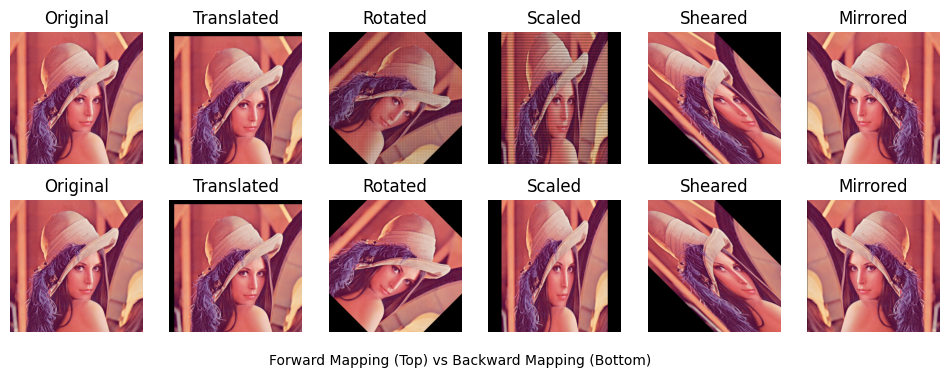

In [ ]:
H, W, C = img.shape

T_translate = translation(20, 20)
T_rotate_centered = center_transform(rotation(np.radians(45)), W, H)
T_scale = center_transform(scaling(0.8, 1.2), W, H)
T_shear = center_transform(shear(1.0, 0), W, H)
T_mirror_centered = center_transform(mirror(np.pi/2), W, H)

forward_translate_img = warp_forward(img, T_translate)
forward_rotate_img = warp_forward(img, T_rotate_centered)
forward_scale_img = warp_forward(img, T_scale)
forward_shear_img = warp_forward(img, T_shear)
forward_mirror_img = warp_forward(img, T_mirror_centered)

backward_translate_img = warp_backward(img, T_translate)
backward_rotate_img = warp_backward(img, T_rotate_centered)
backward_scale_img = warp_backward(img, T_scale)
backward_shear_img = warp_backward(img, T_shear)
backward_mirror_img = warp_backward(img, T_mirror_centered)

fig = plt.figure(figsize=(12,4))

# Forward mapping
# ----------------
plt.subplot(2,6,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(2,6,2)
plt.imshow(forward_translate_img)
plt.title("Translated")

plt.subplot(2,6,3)
plt.imshow(forward_rotate_img)
plt.title("Rotated")

plt.subplot(2,6,4)
plt.imshow(forward_scale_img)
plt.title("Scaled")

plt.subplot(2,6,5)
plt.imshow(forward_shear_img)
plt.title("Sheared")

plt.subplot(2,6,6)
plt.imshow(forward_mirror_img)
plt.title("Mirrored")

# Backward mapping
# -----------------
plt.subplot(2,6,7)
plt.imshow(img)
plt.title("Original")

plt.subplot(2,6,8)
plt.imshow(backward_translate_img)
plt.title("Translated")

plt.subplot(2,6,9)
plt.imshow(backward_rotate_img)
plt.title("Rotated")

plt.subplot(2,6,10)
plt.imshow(backward_scale_img)
plt.title("Scaled")

plt.subplot(2,6,11)
plt.imshow(backward_shear_img)
plt.title("Sheared")

plt.subplot(2,6,12)
plt.imshow(backward_mirror_img)
plt.title("Mirrored")

fig.text(0.5, 0.04, 'Forward Mapping (Top) vs Backward Mapping (Bottom)', ha='center')

# Hide axes
[ax.axis('off') for ax in plt.gcf().axes]

plt.show()

###Task 6 (1 bonus point)
Implement backward mapping with vectorized computation (applying operations on entire arrays without using explicit loops). Use it for all five 2D transformations and display the results.



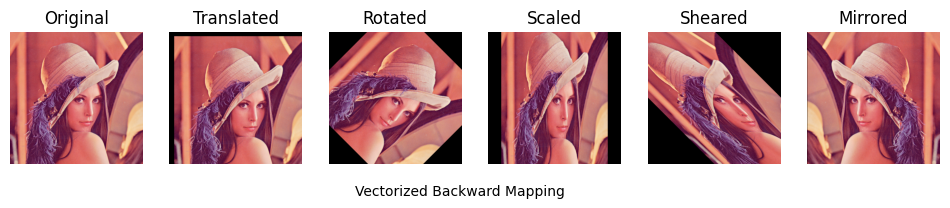

In [ ]:
def warp_backward_vectorized(img, T):
    H, W, C = img.shape

    # xd, yd = np.meshgrid(np.arange(W), np.arange(H), indexing='xy')
    yd, xd = np.indices((H, W))

    out = np.zeros_like(img)
    T_inv = np.linalg.inv(T)

    dst = np.vstack((xd.flatten(), yd.flatten(), np.ones(np.prod(yd.shape))))

    src = T_inv @ dst

    xs = np.round(src[0])
    ys = np.round(src[1])

    xs = xs.reshape(H, W)
    ys = ys.reshape(H, W)

    xi = xs.astype(np.int64)
    yi = ys.astype(np.int64)

    in_bounds = (xs >= 0) & (xs < W) & (ys >= 0) & (ys < H) & (xi >= 0) & (xi < W) & (yi >= 0) & (yi < H)

    out[in_bounds] = img[yi[in_bounds], xi[in_bounds]]
    return out

vectorized_backward_translate_img = warp_backward_vectorized(img, T_translate)
vectorized_backward_rotate_img = warp_backward_vectorized(img, T_rotate_centered)
vectorized_backward_scale_img = warp_backward_vectorized(img, T_scale)
vectorized_backward_shear_img = warp_backward_vectorized(img, T_shear)
vectorized_backward_mirror_img = warp_backward_vectorized(img, T_mirror_centered)

fig = plt.figure(figsize=(12,2))

# Backward mapping
# -----------------
plt.subplot(1,6,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1,6,2)
plt.imshow(vectorized_backward_translate_img)
plt.title("Translated")

plt.subplot(1,6,3)
plt.imshow(vectorized_backward_rotate_img)
plt.title("Rotated")

plt.subplot(1,6,4)
plt.imshow(vectorized_backward_scale_img)
plt.title("Scaled")

plt.subplot(1,6,5)
plt.imshow(vectorized_backward_shear_img)
plt.title("Sheared")

plt.subplot(1,6,6)
plt.imshow(vectorized_backward_mirror_img)
plt.title("Mirrored")

fig.text(0.5, 0.01, 'Vectorized Backward Mapping', ha='center')

# Hide axes
[ax.axis('off') for ax in plt.gcf().axes]

plt.show()
